In [1]:
import bs4 as bs
import urllib.request
import nltk
import spacy

In [ ]:
!python3 -m spacy download pt

# Marcação POS (part-of-speech)



In [3]:
pln = spacy.load('pt')
pln

In [4]:
documento = pln('Estou aprendendo processamento de linguagem natual em Uberlândia')

In [5]:
type(documento)

spacy.tokens.doc.Doc

In [6]:
for token in documento:
  print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natual ADJ
em ADP
Uberlândia PROPN


# Lematização e stemização

In [7]:
for token in documento:
  print(token.text, token.lemma_)

Estou Estou
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natual natual
em em
Uberlândia Uberlândia


In [8]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando cursado cursei')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'cursar',
 'cursar']

In [9]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [10]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [11]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Estou Estou est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natual natual nat
em em em
Uberlândia Uberlândia uberlând


# Carregamento de texto

In [12]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [13]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","mar\xc3\xa7o","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"2eddc916-a9f2-4fd7-b6b8-0f73f75cb519","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Intelig\xc3\xaancia_artificial","wgTitle":"Intelig\xc3\xaancia artificial","wgCurRevisionId":62586855,"wgRevisionId":62586855,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!P\xc3\xa1ginas com erros e

In [14]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"2eddc916-a9f2-4fd7-b6b8-0f73f75cb519","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Inteligência_artificial","wgTitle":"Inteligência artificial","wgCurRevisionId":62586855,"wgRevisionId":62586855,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!Páginas com erros em referências","!CS1 manut: Nomes múltiplos: lista de autores","!CS1 inglês-

In [15]:
paragrafos = dados_html.find_all('p')

In [16]:
paragrafos[1]

<p><b>Inteligência artificial</b> (por vezes mencionada pela sigla em português <b>IA</b> ou pela sigla em inglês <b>AI</b> - <i>artificial intelligence</i>) é a <a href="/wiki/Intelig%C3%AAncia" title="Inteligência">inteligência</a> similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um <a href="/wiki/Agente_inteligente" title="Agente inteligente">agente inteligente</a> é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. <a href="/wiki/Andreas_Kaplan" title="Andreas Kaplan">Andreas Kaplan</a> e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.<sup class="reference" i

In [17]:
paragrafos[1].text

'Inteligência artificial (por vezes mencionada pela sigla em português IA ou pela sigla em inglês AI - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. Andreas Kaplan e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] John McCarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em Darmouth Colege" Gubern, Román: O Eros Eletrónico), a define como "a ciência e engenharia de produzir sistemas inteligentes". É uma área de p

In [18]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [19]:
conteudo

'\n\t\tPáginas para editores conectados saiba mais\nInteligência artificial (por vezes mencionada pela sigla em português IA ou pela sigla em inglês AI - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. Andreas Kaplan e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] John McCarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em Darmouth Colege" Gubern, Román: O Eros Eletrónico), a define como "a ciência e engenharia 

In [20]:
conteudo = conteudo.lower()
conteudo

'\n\t\tpáginas para editores conectados saiba mais\ninteligência artificial (por vezes mencionada pela sigla em português ia ou pela sigla em inglês ai - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. andreas kaplan e michael haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] john mccarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em darmouth colege" gubern, román: o eros eletrónico), a define como "a ciência e engenharia 

# Buscas em textos com spaCy

In [21]:
pln = spacy.load('pt')
pln

In [22]:
string = 'turing'
token_pesquisa = pln(string)

In [23]:
pln.vocab

In [24]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [25]:
doc = pln(conteudo)

matches = matcher(doc)
matches

[(8661325627334373315, 3044, 3045),
 (8661325627334373315, 3054, 3055),
 (8661325627334373315, 3210, 3211),
 (8661325627334373315, 3215, 3216),
 (8661325627334373315, 3221, 3222),
 (8661325627334373315, 3284, 3285),
 (8661325627334373315, 3916, 3917),
 (8661325627334373315, 5191, 5192),
 (8661325627334373315, 8660, 8661),
 (8661325627334373315, 8796, 8797),
 (8661325627334373315, 8892, 8893),
 (8661325627334373315, 9009, 9010)]

In [26]:
doc[3044:3046]

turing foi

In [27]:
matches[0], matches[0][1], matches[0][2]

((8661325627334373315, 3044, 3045), 3044, 3045)

In [28]:
from IPython.core.display import HTML

numero_palavras = 50

doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()} </h1>'))
display(HTML(f"""<p><strong> Resultados encontrados:  </strong> {len(matches)} </p>"""))
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto = str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")

  display(HTML(f"""... {texto} ..."""))

# Extração de entidades nomeadas

In [29]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

andreas kaplan PER
michael haenlein PER
john mccarthy PER
gubern PER
román LOC
inteligente[2 MISC
cotidiano).[4 ORG
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
google ORG
wikipedia MISC
john mccarthy PER
racionalmente".[10][11 MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
problem solver PER
gps PER
newell PER
gps ORG
brasil LOC
associação brasileira de inteligência artificial ORG
allen newell PER
herbert simon PER
universidade carnegie mellon ORG
marvin minsky PER
mit ai lab MISC
conferência de verão de 1956 MISC
darthmouth college.[14 LOC
advanced research projects agency” ORG
estados unidos LOC
generation project” MISC
japão LOC
sub-simbólico"?[16 LOC
john haugeland PER
good old-fashioned artificial intelligence MISC
w. grey walter PER
johns hopkins PER
universidade de princeton LOC
club ORG
inglater

In [30]:
from spacy import displacy

displacy.render(doc, style='ent', jupyter=True)

# Cloud word e stop words

In [38]:
from spacy.lang.pt.stop_words import STOP_WORDS

print(STOP_WORDS)

{'fazes', 'tal', 'à', 'nem', 'ir', 'um', 'área', 'foram', 'cuja', 'estás', 'naquele', 'momento', 'vez', 'lá', 'nova', 'ponto', 'quinta', 'estas', 'quais', 'sétimo', 'temos', 'aqueles', 'cento', 'nove', 'catorze', 'pouca', 'dos', 'fora', 'tempo', 'somos', 'novas', 'aquele', 'deverá', 'foste', 'nada', 'te', 'dentro', 'tentei', 'são', 'pode', 'os', 'tanta', 'me', 'povo', 'tivemos', 'vindo', 'vossa', 'muito', 'pois', 'até', 'tua', 'sobre', 'maiorias', 'talvez', 'usa', 'do', 'dar', 'vários', 'apoia', 'pelo', 'seria', 'quando', 'elas', 'seis', 'aquela', 'dezanove', 'umas', 'faz', 'lhe', 'vem', 'quieta', 'ambos', 'dez', 'fui', 'oitavo', 'lado', 'obrigado', 'ainda', 'mais', 'sexto', 'parece', 'sistema', 'tão', 'dezasseis', 'posso', 'ao', 'contra', 'eventual', 'como', 'favor', 'primeiro', 'relação', 'muitos', 'segunda', 'tente', 'diz', 'só', 'essa', 'devem', 'inicio', 'de', 'agora', 'que', 'tuas', 'caminho', 'tivestes', 'assim', 'bastante', 'enquanto', 'uma', 'menor', 'fazer', 'mal', 'disso', '

In [40]:
pln.vocab['tal'].is_stop

True

In [39]:
doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)

In [42]:
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [43]:
len(lista_token), len(sem_stop)

(9939, 6602)

In [31]:
from matplotlib.colors import ListedColormap

color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [33]:
from wordcloud import WordCloud

cloud = WordCloud(background_color ='white', max_words = 100, colormap=color_map)

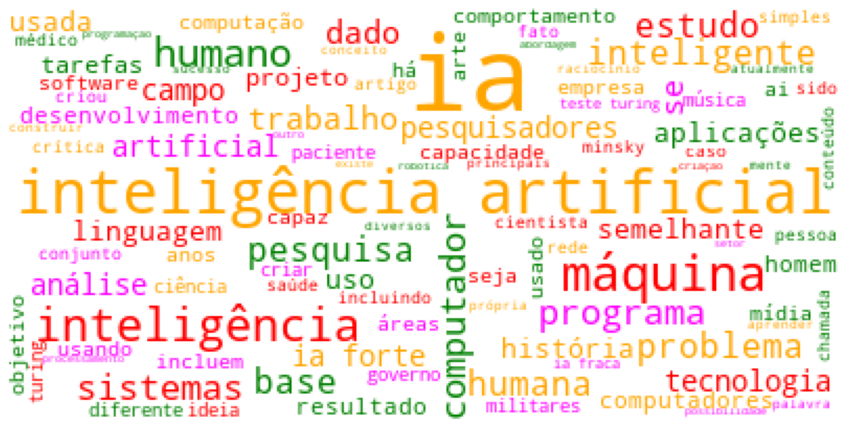

In [45]:
import matplotlib.pyplot as plt

cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()